# Analytics Vidhya Hackathon

In [107]:
# Importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from collections import Counter
from matplotlib.pylab import rcParams
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# To display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis on Training data

In [5]:
# Loading Training data
data_train = pd.read_csv('train.csv')

In [8]:
data_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [9]:
data_train.shape

(116058, 29)

In [10]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null object
first_payment_date          116058 non-null object
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2                  

In [11]:
data_train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,1.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


In [18]:
# Checking for Null Values

data_train.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [12]:
Counter(data_train.source)

Counter({'Z': 14646, 'Y': 37554, 'X': 63858})

In [13]:
Counter(data_train.loan_purpose) 

Counter({'C86': 28213, 'B12': 29383, 'A23': 58462})

In [14]:
Counter(data_train.financial_institution) 

Counter({'Turner, Baldwin and Rhodes': 1846,
         'Swanson, Newton and Miller': 6874,
         'Thornton-Davis': 651,
         'OTHER': 49699,
         'Browning-Hart': 31852,
         'Richardson Ltd': 473,
         'Edwards-Hoffman': 4857,
         'Richards-Walters': 1459,
         'Martinez, Duffy and Bird': 4715,
         'Miller, Mcclure and Allen': 3158,
         'Anderson-Taylor': 483,
         'Taylor, Hunt and Rodriguez': 1259,
         'Nicholson Group': 2116,
         'Cole, Brooks and Vincent': 1642,
         'Sanchez, Hays and Wilkerson': 853,
         'Sanchez-Robinson': 1193,
         'Suarez Inc': 1790,
         'Romero, Woods and Johnson': 750,
         'Chapman-Mcmahon': 388})

In [16]:
# Count of target variable
Counter(data_train.m13) 

Counter({1: 636, 0: 115422})

In [21]:
# Selecting only numerical features

num_data_train = data_train[['interest_rate','unpaid_principal_bal','loan_term','loan_to_value','number_of_borrowers','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score','insurance_type','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']]

In [20]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_data_train.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,0.003197,0.002059,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,0.063354,0.051391,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,4.375000,3.840000e+05,360.000000,85.000000,2.000000,43.000000,809.000000,12.000000,806.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
95%,4.625000,4.170000e+05,360.000000,92.000000,2.000000,45.000000,814.000000,25.000000,812.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
99%,5.000000,5.540000e+05,360.000000,95.000000,2.000000,49.000000,820.000000,30.000000,819.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


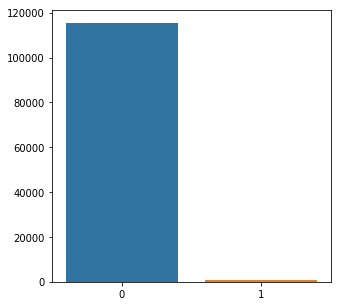

In [25]:
# Comparing the number of classes present in the target feature
rcParams['figure.figsize'] = 5,5
y = data_train['m13'].value_counts()
sb.barplot(y.index, y.values)

#### Inference - Data is highly imbalanced

In [28]:
# Loading the test data
data_test = pd.read_csv('test.csv')

In [29]:
data_test.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,Y,Browning-Hart,3.875,417000,360,01/02/12,Apr-12,75,1,20,790,A23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,X,OTHER,4.500,113000,360,01/02/12,Apr-12,80,2,33,793,C86,0,784,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Y,OTHER,4.500,72000,360,01/01/12,Mar-12,75,1,34,710,C86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,X,"Miller, Mcclure and Allen",4.125,123000,180,01/02/12,Apr-12,41,2,24,798,A23,0,813,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,X,Browning-Hart,3.250,166000,180,01/02/12,Apr-12,53,2,12,767,A23,0,768,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
data_test.shape

(35866, 28)

In [30]:
data_test.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
dtype: int64

In [32]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35866 entries, 0 to 35865
Data columns (total 28 columns):
loan_id                     35866 non-null int64
source                      35866 non-null object
financial_institution       35866 non-null object
interest_rate               35866 non-null float64
unpaid_principal_bal        35866 non-null int64
loan_term                   35866 non-null int64
origination_date            35866 non-null object
first_payment_date          35866 non-null object
loan_to_value               35866 non-null int64
number_of_borrowers         35866 non-null int64
debt_to_income_ratio        35866 non-null int64
borrower_credit_score       35866 non-null int64
loan_purpose                35866 non-null object
insurance_percent           35866 non-null int64
co-borrower_credit_score    35866 non-null int64
insurance_type              35866 non-null int64
m1                          35866 non-null int64
m2                          35866 non-null int64
m3

## Data Preparation

In [35]:
# Data preparation - Converting string type features to datetime format

data_train['origination_date']= pd.to_datetime(data_train['origination_date'])

In [36]:
data_train['first_payment_date']= pd.to_datetime(data_train['first_payment_date'])

In [38]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
loan_id                     116058 non-null int64
source                      116058 non-null object
financial_institution       116058 non-null object
interest_rate               116058 non-null float64
unpaid_principal_bal        116058 non-null int64
loan_term                   116058 non-null int64
origination_date            116058 non-null datetime64[ns]
first_payment_date          116058 non-null datetime64[ns]
loan_to_value               116058 non-null int64
number_of_borrowers         116058 non-null float64
debt_to_income_ratio        116058 non-null float64
borrower_credit_score       116058 non-null float64
loan_purpose                116058 non-null object
insurance_percent           116058 non-null float64
co-borrower_credit_score    116058 non-null float64
insurance_type              116058 non-null float64
m1                          116058 non-null int64
m2  

In [39]:
data_train.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [43]:
# Feature extraction
src = pd.get_dummies(data_train['source'],drop_first = False)

In [45]:
# Applying Dummy Encoding to feature 'loan_purpose' and concatenating into original dataframe

loan_pur = pd.get_dummies(data_train['loan_purpose'],drop_first = False)

In [44]:
src.head()

,X,Y,Z
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


In [46]:
loan_pur.head()

,A23,B12,C86
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,0,1


In [47]:
# Concatenating with original dataframe
data_train = pd.concat([data_train, src,loan_pur], axis = 1)

In [49]:
# Dropping original features

data_train.drop(['source','loan_purpose'],axis = 1,inplace = True)

In [53]:
data_train.head()

,loan_id,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,X,Y,Z,A23,B12,C86
0,268055008619,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,672831657627,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,742515242108,Thornton-Davis,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,601385667462,OTHER,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0
4,273870029961,OTHER,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1


## Data Visualization

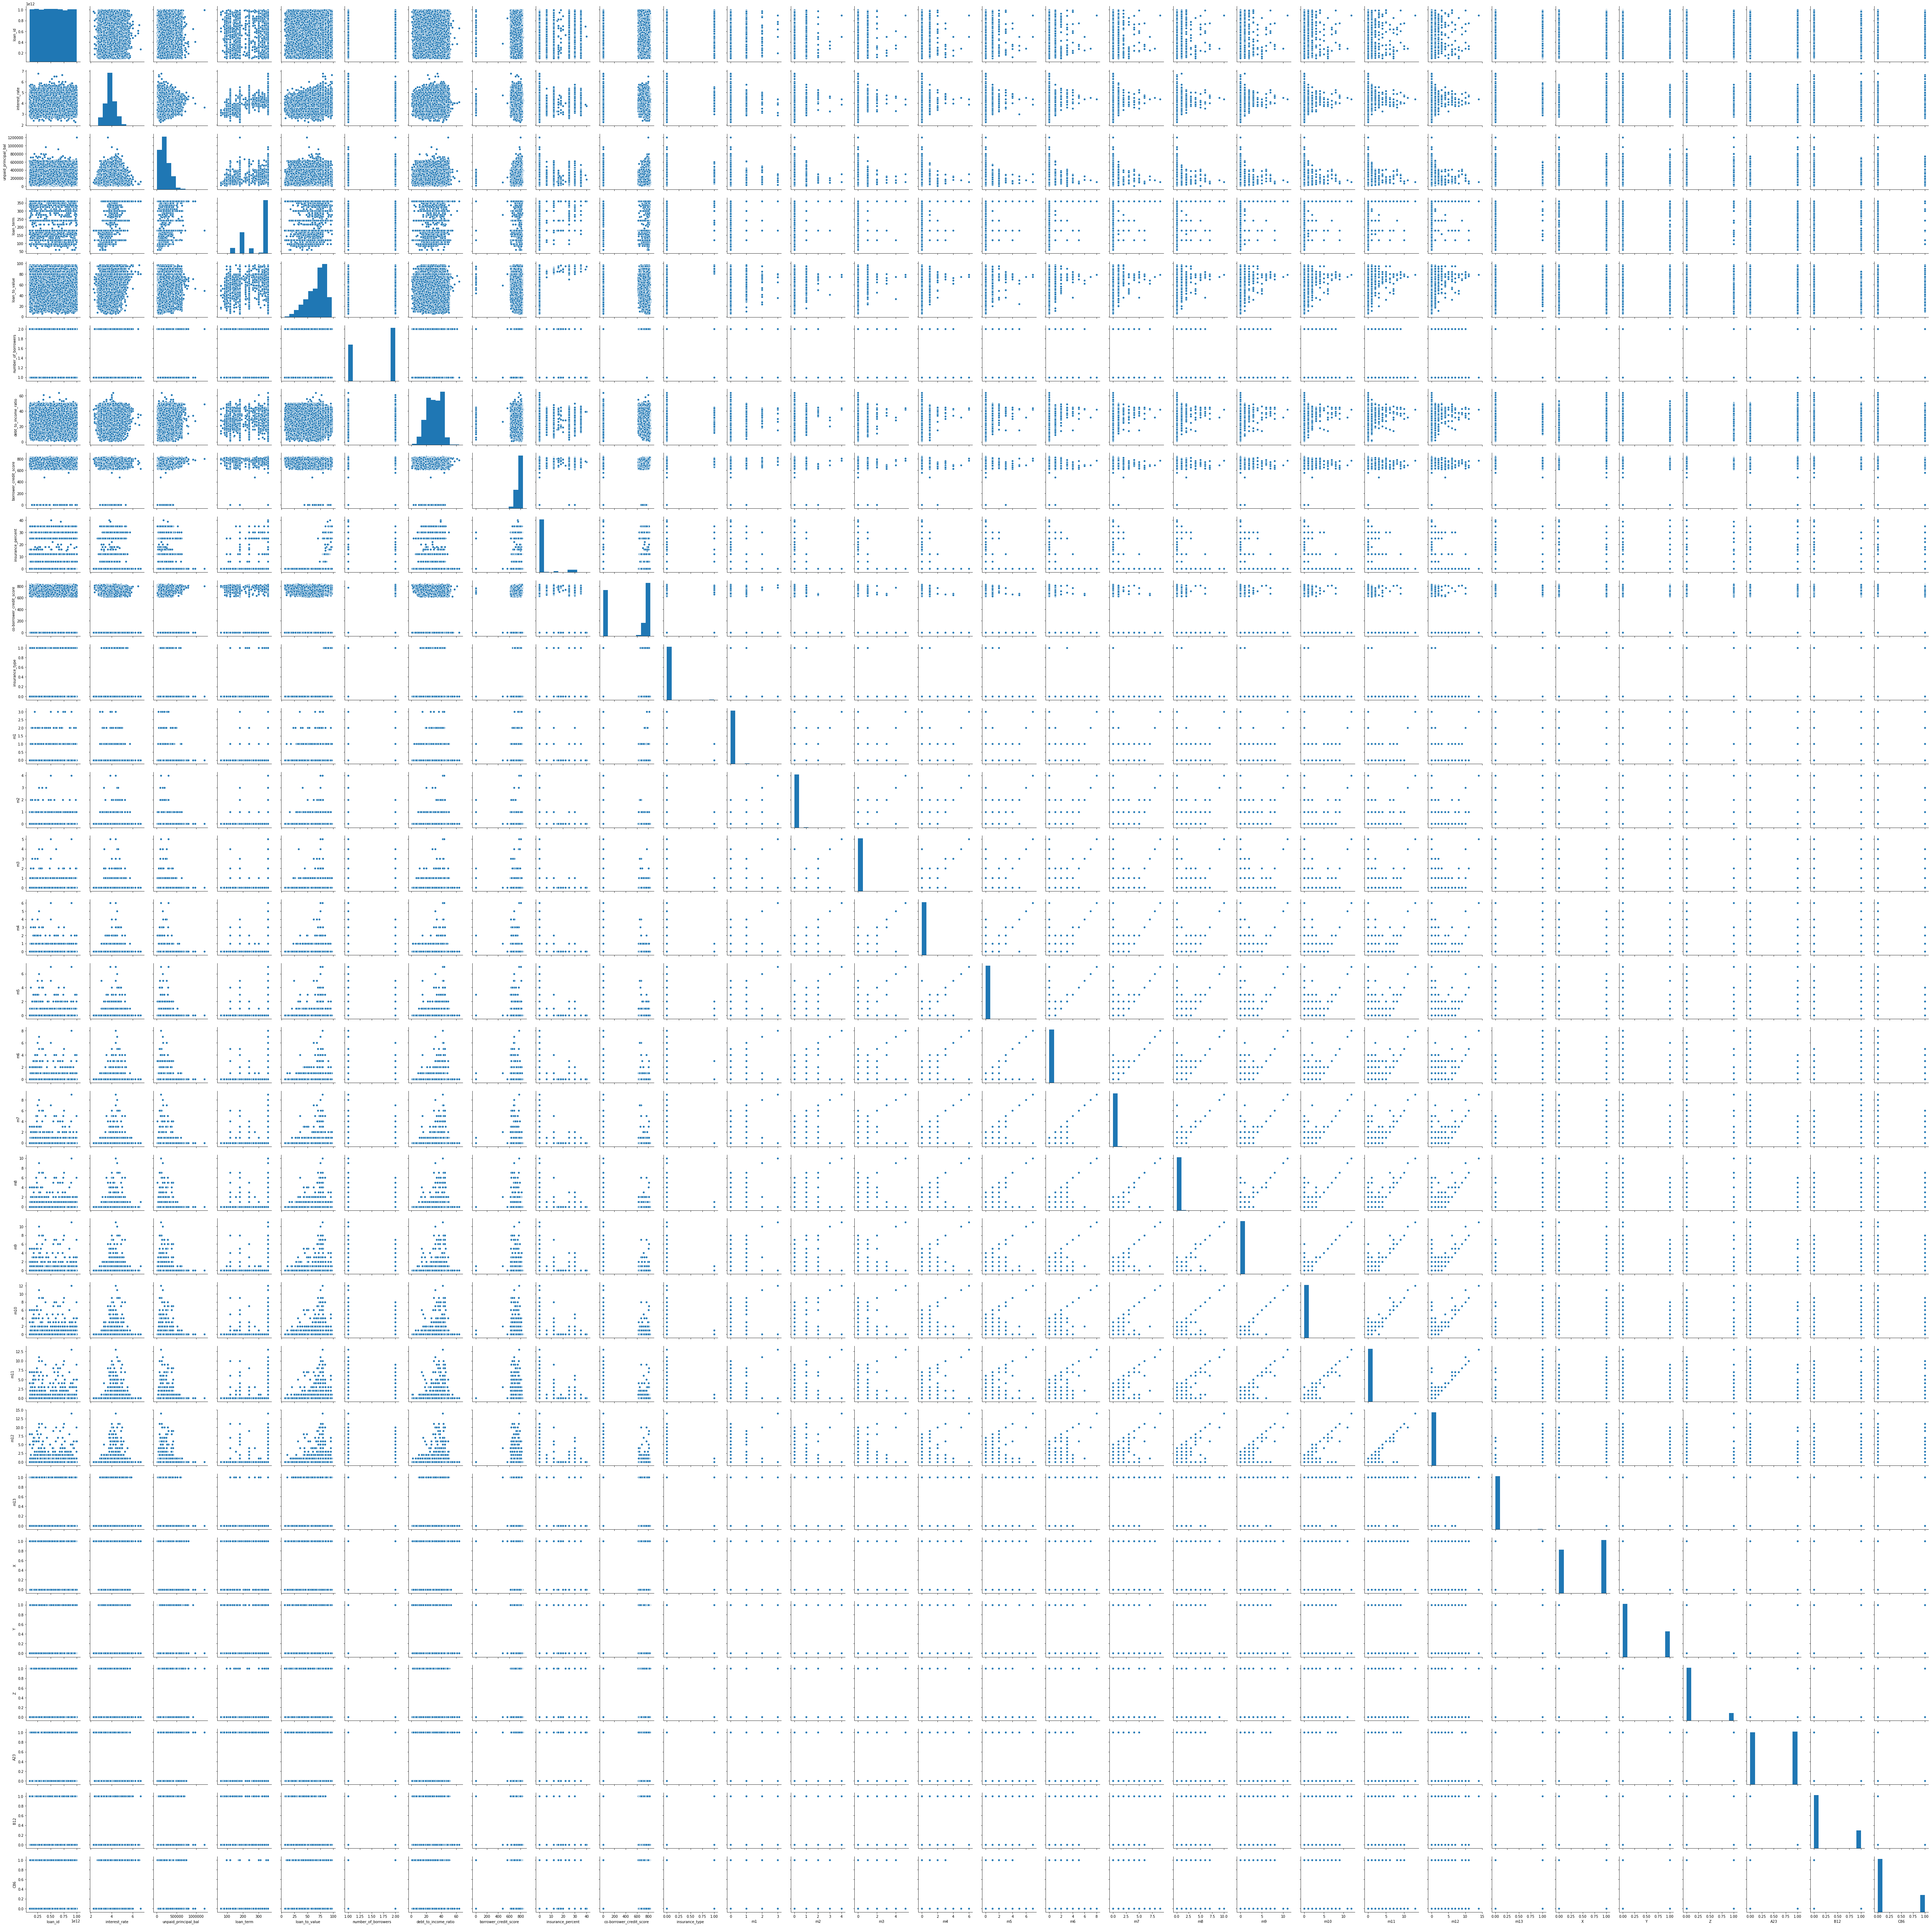

In [54]:
rcParams['figure.figsize'] = 25,25
sb.pairplot(data_train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

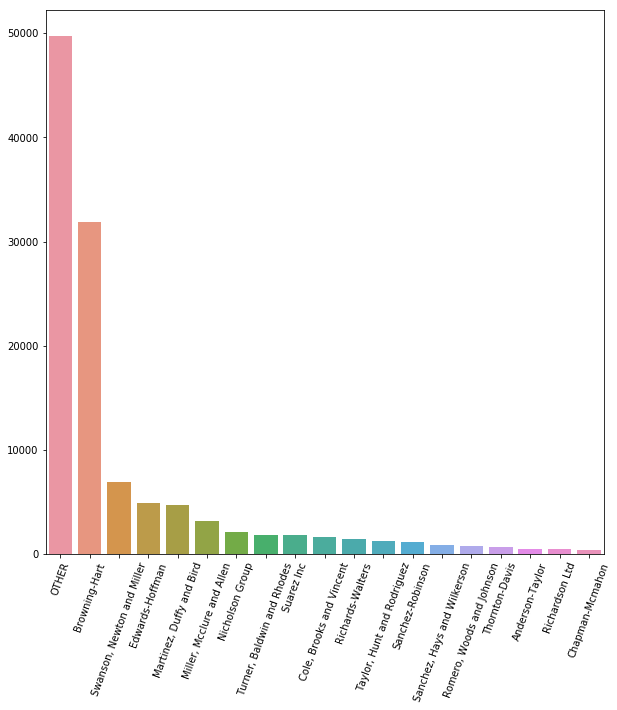

In [59]:
# Comapring the number of classes for 'financial_institution' variable.
rcParams['figure.figsize'] = 10,10
y1 = data_train['financial_institution'].value_counts()
sb.barplot(y1.index, y1.values)
plt.xticks(rotation=70)

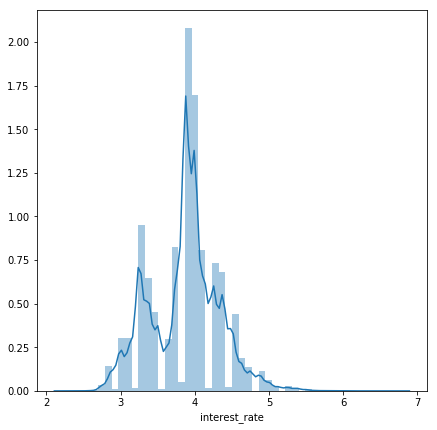

In [61]:
rcParams['figure.figsize'] = 7,7
sb.distplot(data_train.interest_rate)

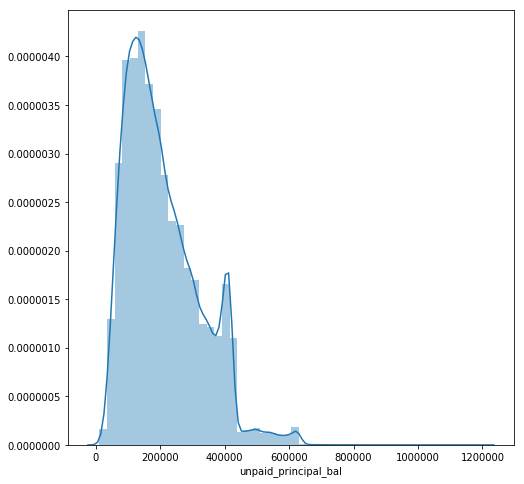

In [63]:
rcParams['figure.figsize'] = 8,8
sb.distplot(data_train.unpaid_principal_bal)                       

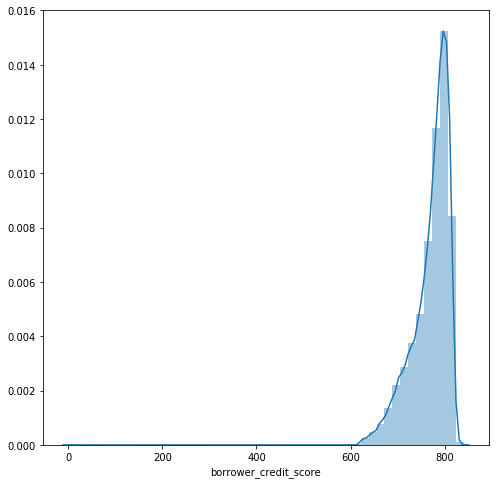

In [65]:
rcParams['figure.figsize'] = 8,8
sb.distplot(data_train.borrower_credit_score)                                                        

In [70]:
# Label Encoding feature 'financial_institution'

le = LabelEncoder()

In [71]:
data_train['financial_institution'] = le.fit_transform(data_train.financial_institution)

In [72]:
data_train.head()

,loan_id,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,X,Y,Z,A23,B12,C86
0,268055008619,18,4.250,214000,360,2012-03-01,2012-05-01,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,672831657627,15,4.875,144000,360,2012-01-01,2012-03-01,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,742515242108,17,3.250,366000,180,2012-01-01,2012-03-01,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,601385667462,8,4.750,135000,360,2012-02-01,2012-04-01,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0
4,273870029961,8,4.750,124000,360,2012-02-01,2012-04-01,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1


In [73]:
# Extracting features from Date fields - 'origination_date' and 'first_payment_date'

# Month

data_train['Month_Og_Date'] = data_train['origination_date'].dt.month

In [74]:
# Month

data_train['Month_pay_Date'] = data_train['first_payment_date'].dt.month

In [76]:
# Year
data_train['Year_Og_Date'] = data_train['origination_date'].dt.year

In [77]:
# Year
data_train['Year_pay_Date'] = data_train['first_payment_date'].dt.year

In [80]:
# Dropping original columns

data_train.drop(['Year_Og_Date','Year_pay_Date','origination_date','first_payment_date'],axis = 1,inplace=True)

In [81]:
data_train.head()

,loan_id,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,X,Y,Z,A23,B12,C86,Month_Og_Date,Month_pay_Date
0,268055008619,18,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,3,5
1,672831657627,15,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,3
2,742515242108,17,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,3
3,601385667462,8,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,2,4
4,273870029961,8,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1,2,4


In [82]:
# Correlation plot

data_train1 = data_train.corr()

In [83]:
data_train1.head()

,loan_id,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,X,Y,Z,A23,B12,C86,Month_Og_Date,Month_pay_Date
loan_id,1.000000,0.000553,-0.000902,0.005385,-0.001277,0.000761,0.001739,0.003894,0.001230,0.000948,0.001919,-0.000032,0.000389,-0.007118,-0.000104,-0.007563,-0.005626,-0.005968,-0.006668,-0.002793,-0.003849,-0.002362,-0.004116,-0.003572,-0.002982,0.004076,-0.004993,0.000928,-0.003652,0.005229,-0.001044,0.005465,0.003313
financial_institution,0.000553,1.000000,-0.106974,-0.063765,-0.144282,-0.039592,0.027083,-0.045098,0.002762,-0.031551,0.026576,0.025126,-0.011303,-0.005862,-0.003787,-0.001117,-0.002039,0.002292,-0.001684,0.001187,-0.000811,0.002358,0.001430,0.000510,-0.001860,0.144397,-0.202485,0.068954,0.021458,0.052186,-0.077913,0.093145,0.100520
interest_rate,-0.000902,-0.106974,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,0.055883,0.017420,0.026092,0.026727,0.030543,0.035726,0.034311,0.032133,0.035393,0.035841,0.037994,0.037051,0.039708,0.054298,-0.058401,0.076662,-0.020517,-0.192234,-0.020857,0.245211,-0.128576,-0.136119
unpaid_principal_bal,0.005385,-0.063765,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,0.015985,0.001343,-0.004001,-0.006026,-0.010344,-0.011461,-0.007814,-0.008912,-0.009228,-0.008983,-0.005866,-0.006412,-0.008254,-0.017120,-0.098871,0.023241,0.115376,0.155770,-0.113262,-0.066751,0.024928,0.024377
loan_term,-0.001277,-0.144282,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,0.028731,0.008976,0.011739,0.010129,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015773,0.023502,-0.127331,0.111651,0.033452,-0.143415,-0.127696,0.296611,-0.020956,-0.028520


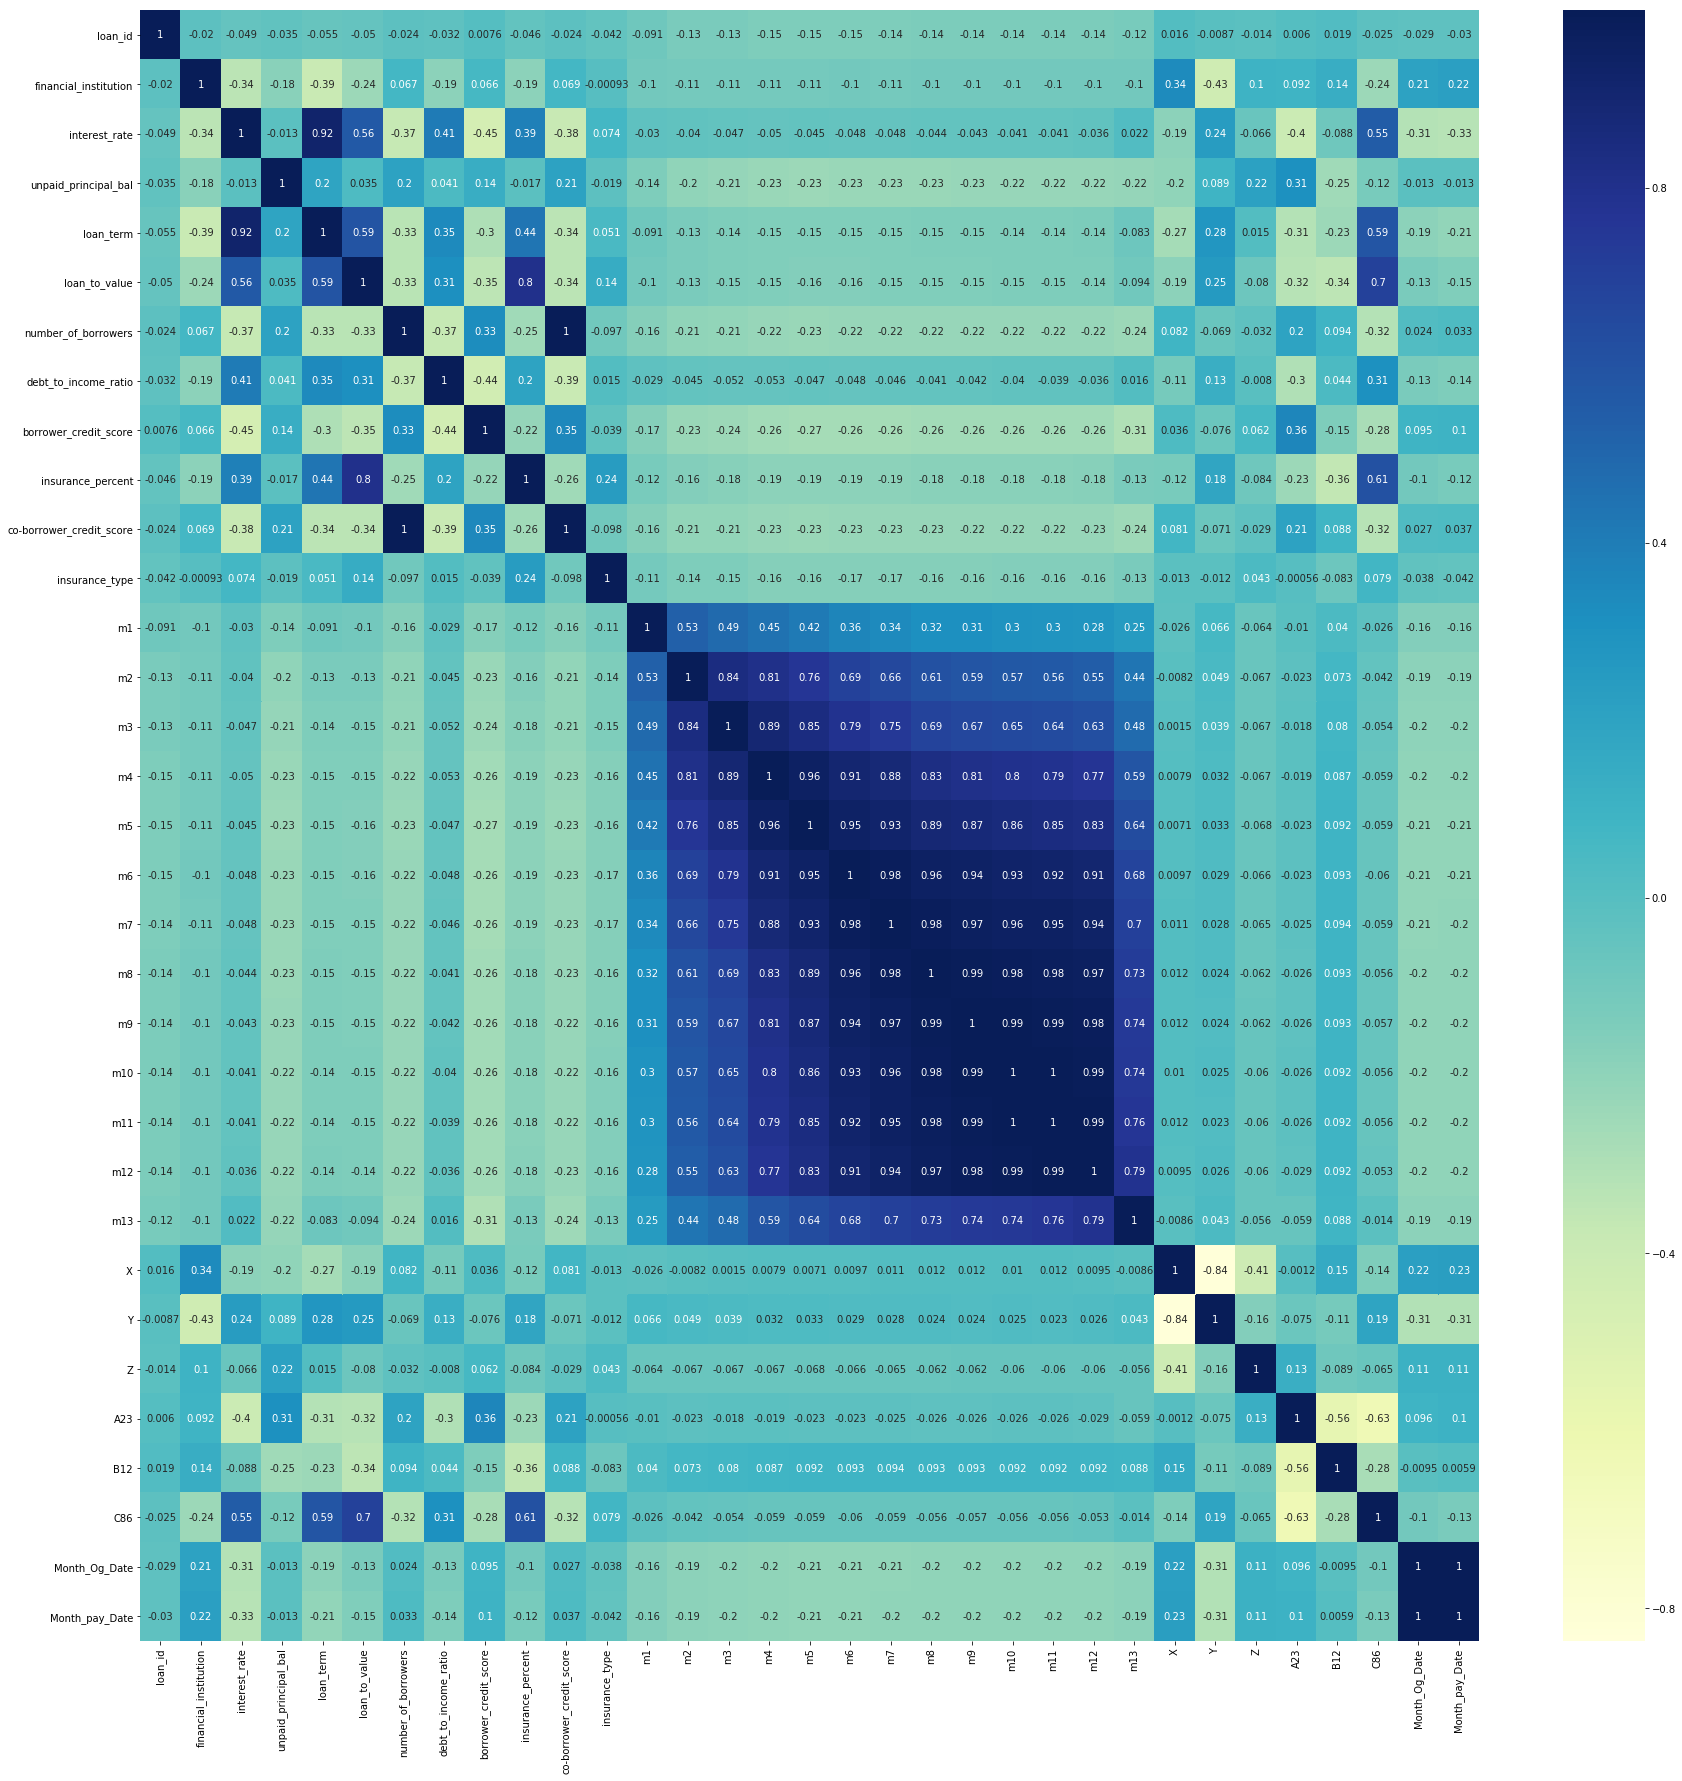

In [85]:
# Correlation matrix using heatmap before scaling
plt.figure(figsize = (30, 30))
sb.heatmap(data_train1.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [86]:
# Dropping feature 'loan_id'

data_train.drop('loan_id',axis = 1, inplace=True)

In [87]:
data_train.shape

(116058, 32)

### Using Oversampling technique - SMOTE

In [91]:
# Using SMOTE technique for oversampling
from imblearn.over_sampling import SMOTE

In [92]:
smote = SMOTE()

In [95]:
X_train = data_train.drop(['m13'], axis = 1)
y_train = data_train['m13']

In [96]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [97]:
print(X_train_smote)

[[1.80000000e+01 4.25000000e+00 2.14000000e+05 ... 1.00000000e+00
  3.00000000e+00 5.00000000e+00]
 [1.50000000e+01 4.87500000e+00 1.44000000e+05 ... 0.00000000e+00
  1.00000000e+00 3.00000000e+00]
 [1.70000000e+01 3.25000000e+00 3.66000000e+05 ... 0.00000000e+00
  1.00000000e+00 3.00000000e+00]
 ...
 [5.20945070e+00 4.42483124e+00 2.10601350e+05 ... 6.99324950e-01
  2.00000000e+00 4.00000000e+00]
 [6.27229657e+00 4.35798146e+00 1.02136148e+05 ... 0.00000000e+00
  1.00000000e+00 3.86385171e+00]
 [1.43061126e+01 4.40087323e+00 1.87900873e+05 ... 0.00000000e+00
  1.90087323e+00 3.90087323e+00]]


In [98]:
print(y_train_smote)

[1 1 1 ... 1 1 1]


In [99]:
Counter(y_train_smote)

Counter({1: 115422, 0: 115422})

In [101]:
# Converting X_train_smote to a dataframe which is a numpy array
X_train_smote = pd.DataFrame(X_train_smote)

In [102]:
X_train_smote.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,18.0,4.250,214000.0,360.0,95.0,1.0,22.0,694.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,5.0
1,15.0,4.875,144000.0,360.0,72.0,1.0,44.0,697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
2,17.0,3.250,366000.0,180.0,49.0,1.0,33.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
3,8.0,4.750,135000.0,360.0,46.0,2.0,44.0,633.0,0.0,638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0
4,8.0,4.750,124000.0,360.0,80.0,1.0,43.0,681.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0


In [104]:
# Renaming columns

X_train_smote.columns = ['financial_institution','interest_rate','unpaid_principal_bal','loan_term','loan_to_value','number_of_borrowers','debt_to_income_ratio','borrower_credit_score','insurance_percent','co-borrower_credit_score','insurance_type','m1','m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12','X','Y','Z','A23','B12','C86','Month_Og_Date','Month_pay_Date']

In [105]:
X_train_smote.head()

,financial_institution,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,X,Y,Z,A23,B12,C86,Month_Og_Date,Month_pay_Date
0,18.0,4.250,214000.0,360.0,95.0,1.0,22.0,694.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,5.0
1,15.0,4.875,144000.0,360.0,72.0,1.0,44.0,697.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
2,17.0,3.250,366000.0,180.0,49.0,1.0,33.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
3,8.0,4.750,135000.0,360.0,46.0,2.0,44.0,633.0,0.0,638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0
4,8.0,4.750,124000.0,360.0,80.0,1.0,43.0,681.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,4.0


## Model Building using Logistic Regression and Recursive feature elimination

In [108]:
# Logistic regression model
logm = sm.GLM(y_train_smote,(sm.add_constant(X_train_smote)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               230844
Model:                            GLM   Df Residuals:                   230814
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 23 Aug 2019   Deviance:                          nan
Time:                        23:00:35   Pearson chi2:                 5.11e+16
No. Iterations:                   100   Covariance Type:             nonrobust
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.0876      0.185     11.287      0.000       1.725       2.450
financial_institution       -0.0061      0.002     -3.416      0.001      -0.010      -0.003
interest_rate                0.7385      0.023     31.824      0.000       0.693       0.784
unpaid_principal_bal      1.833e-07   7.11e-08      2.578      0.010    4.39e-08    3.23e-07
loan_term                   -0.0014      0.000    -10.765      0.000      -0.002      -0.001
loan_to_value               -0.0017      0.001     -2.951      0.003      -0.003      -0.001
number_of_borrowers          2.1661      0.192     11.272      0.000       1.789       2.543
debt_to_income_ratio         0.0206      0.001     23.358      0.000       0.019       0.022
borrower_credit_score       -0.0135      0.000    -69.842      0.000      -0.014      -0.013
insurance_percent           -0.0003      0.001     -0.278      0.781      -0.002       0.002
co-borrower_credit_score    -0.0036      0.000    -14.284      0.000      -0.004      -0.003
insurance_type               0.8257      0.095      8.684      0.000       0.639       1.012
m1                           1.7068      0.087     19.584      0.000       1.536       1.878
m2                           1.4756      0.123     11.981      0.000       1.234       1.717
m3                           0.0526      0.154      0.341      0.733      -0.250       0.355
m4                           3.4039      0.144     23.653      0.000       3.122       3.686
m5                           2.9514      0.111     26.680      0.000       2.735       3.168
m6                           2.0249      0.119     17.009      0.000       1.792       2.258
m7                           1.8996      0.117     16.293      0.000       1.671       2.128
m8                           2.3371      0.112     20.911      0.000       2.118       2.556
m9                           2.9043      0.121     24.102      0.000       2.668       3.141
m10                          2.3901      0.100     23.910      0.000       2.194       2.586
m11                          4.9425      0.123     40.256      0.000       4.702       5.183
m12                         12.2447      0.189     64.639      0.000      11.873      12.616
X                            0.5389      0.063      8.591      0.000       0.416       0.662
Y                            0.8764      0.063     13.970      0.000       0.753       0.999
Z                            0.6723      0.064     10.520      0.000       0.547       0.798
A23                          0.6771      0.062     10.856      0.000       0.555       0.799
B12                          0.7679      0.063     12.245      0.000       0.645       0.891
C86                          0.6426      0.063     10.128      0.000       0.518       0.767
Month_Og_Date                0.0081      0.035      0.233      0.816      -0.060       0.076


In [109]:
logreg = LogisticRegression()

In [110]:
# Running RFE with 13 variables as output
rfe = RFE(logreg, 13)             
rfe = rfe.fit(X_train_smote, y_train_smote)

In [111]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False])

In [112]:
list(zip(X_train_smote.columns, rfe.support_, rfe.ranking_))

[('financial_institution', False, 13),
 ('interest_rate', False, 3),
 ('unpaid_principal_bal', False, 19),
 ('loan_term', False, 17),
 ('loan_to_value', False, 16),
 ('number_of_borrowers', False, 4),
 ('debt_to_income_ratio', False, 11),
 ('borrower_credit_score', False, 12),
 ('insurance_percent', False, 18),
 ('co-borrower_credit_score', False, 15),
 ('insurance_type', False, 5),
 ('m1', True, 1),
 ('m2', True, 1),
 ('m3', False, 9),
 ('m4', True, 1),
 ('m5', True, 1),
 ('m6', True, 1),
 ('m7', True, 1),
 ('m8', True, 1),
 ('m9', True, 1),
 ('m10', True, 1),
 ('m11', True, 1),
 ('m12', True, 1),
 ('X', True, 1),
 ('Y', False, 2),
 ('Z', True, 1),
 ('A23', False, 6),
 ('B12', False, 8),
 ('C86', False, 7),
 ('Month_Og_Date', False, 14),
 ('Month_pay_Date', False, 10)]

In [113]:
col = X_train_smote.columns[rfe.support_]

In [114]:
X_train_smote.columns[~rfe.support_]

Index(['financial_institution', 'interest_rate', 'unpaid_principal_bal',
       'loan_term', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'insurance_type', 'm3', 'Y', 'A23', 'B12',
       'C86', 'Month_Og_Date', 'Month_pay_Date'],
      dtype='object')

In [115]:
X_train_sm = sm.add_constant(X_train_smote[col])

In [116]:
logm2 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())

In [117]:
res = logm2.fit()

In [118]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               230844
Model:                            GLM   Df Residuals:                   230830
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 23 Aug 2019   Deviance:                          nan
Time:                        23:13:55   Pearson chi2:                 6.54e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3589      0.012   -118.098      0.000      -1.381      -1.336
m1             2.3884      0.087     27.366      0.000       2.217       2.559
m2             2.0814      0.118     17.684      0.000       1.851       2.312
m4             4.2528      0.146     29.048      0.000       3.966       4.540
m5             3.2786      0.112     29.270      0.000       3.059       3.498
m6             2.6847      0.122     22.092      0.000       2.446       2.923
m7             3.0356      0.120     25.263      0.000       2.800       3.271
m8             3.3496      0.116     28.923      0.000       3.123       3.577
m9             3.8473      0.125     30.882      0.000       3.603       4.091
m10            3.0198      0.097     31.138      0.000       2.830       3.210
m11            5.2005      0.126     41.243      0.000       4.953       5.448
m12           13.5870      0.195     69.503      0.000      13.204      13.970
X             -0.4051      0.015    -26.369      0.000      -0.435      -0.375
Z             -0.3833      0.024    -15.936      0.000      -0.430      -0.336
==============================================================================
"""

#### All the p  values are within range i.e., less than 0.05

## Checking for Multi-Collinearity

In [119]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,m11,18.93
8,m10,15.98
7,m9,14.22
10,m12,11.51
6,m8,9.69
5,m7,9.65
4,m6,8.04
3,m5,6.74
2,m4,4.80
1,m2,2.33


In [120]:
# Dropping feature 'm11' due to its high VIF value

col = col.drop('m11', 1)
col

Index(['m1', 'm2', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm12', 'X', 'Z'], dtype='object')

In [121]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])

In [122]:
logm3 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())

In [123]:
res = logm3.fit()

In [124]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               230844
Model:                            GLM   Df Residuals:                   230831
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 24 Aug 2019   Deviance:                          nan
Time:                        13:08:24   Pearson chi2:                 6.56e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2946      0.011   -115.111      0.000      -1.317      -1.273
m1             2.6288      0.086     30.573      0.000       2.460       2.797
m2             2.1346      0.117     18.284      0.000       1.906       2.363
m4             4.4490      0.150     29.689      0.000       4.155       4.743
m5             3.3748      0.111     30.383      0.000       3.157       3.593
m6             2.7900      0.121     22.995      0.000       2.552       3.028
m7             3.6677      0.119     30.728      0.000       3.434       3.902
m8             4.1242      0.117     35.396      0.000       3.896       4.353
m9             3.7944      0.126     30.109      0.000       3.547       4.041
m10            3.6955      0.099     37.348      0.000       3.502       3.889
m12           14.8622      0.199     74.630      0.000      14.472      15.253
X             -0.4255      0.015    -28.218      0.000      -0.455      -0.396
Z             -0.4377      0.024    -18.358      0.000      -0.484      -0.391
==============================================================================
"""

In [125]:
# Checking for VIF values once again
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,m9,14.18
8,m10,12.55
6,m8,9.69
5,m7,9.65
4,m6,8.03
3,m5,6.74
9,m12,6.47
2,m4,4.79
1,m2,2.33
0,m1,1.67


In [126]:
# Dropping feature 'm9' due to its high VIF value

col = col.drop('m9', 1)
col

Index(['m1', 'm2', 'm4', 'm5', 'm6', 'm7', 'm8', 'm10', 'm12', 'X', 'Z'], dtype='object')

In [127]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])

In [128]:
logm3 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())

In [129]:
res = logm3.fit()

In [130]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               230844
Model:                            GLM   Df Residuals:                   230832
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 24 Aug 2019   Deviance:                          nan
Time:                        13:12:11   Pearson chi2:                 5.55e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2587      0.011   -113.366      0.000      -1.280      -1.237
m1             2.6064      0.086     30.260      0.000       2.438       2.775
m2             2.0697      0.117     17.669      0.000       1.840       2.299
m4             4.7732      0.152     31.302      0.000       4.474       5.072
m5             3.3983      0.112     30.366      0.000       3.179       3.618
m6             2.8716      0.122     23.619      0.000       2.633       3.110
m7             3.7032      0.120     30.756      0.000       3.467       3.939
m8             4.8285      0.118     40.750      0.000       4.596       5.061
m10            4.0676      0.100     40.662      0.000       3.872       4.264
m12           15.2575      0.201     75.830      0.000      14.863      15.652
X             -0.4471      0.015    -29.900      0.000      -0.476      -0.418
Z             -0.4655      0.024    -19.597      0.000      -0.512      -0.419
==============================================================================
"""

In [131]:
# Checking for VIF values once again
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,m7,9.64
7,m10,8.79
4,m6,8.01
6,m8,7.65
3,m5,6.70
8,m12,6.43
2,m4,4.78
1,m2,2.32
0,m1,1.65
9,X,1.11


In [132]:
# Dropping feature 'm7' due to its high VIF value

col = col.drop('m7', 1)
col

Index(['m1', 'm2', 'm4', 'm5', 'm6', 'm8', 'm10', 'm12', 'X', 'Z'], dtype='object')

In [133]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train_smote[col])

In [134]:
logm3 = sm.GLM(y_train_smote,X_train_sm, family = sm.families.Binomial())

In [135]:
res = logm3.fit()

In [136]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:               230844
Model:                            GLM   Df Residuals:                   230833
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 24 Aug 2019   Deviance:                          nan
Time:                        13:15:17   Pearson chi2:                 5.68e+16
No. Iterations:                   100   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2480      0.011   -112.773      0.000      -1.270      -1.226
m1             2.5929      0.086     30.095      0.000       2.424       2.762
m2             2.1855      0.118     18.560      0.000       1.955       2.416
m4             5.3226      0.155     34.341      0.000       5.019       5.626
m5             3.5359      0.112     31.539      0.000       3.316       3.756
m6             2.9888      0.124     24.159      0.000       2.746       3.231
m8             4.9750      0.120     41.347      0.000       4.739       5.211
m10            4.2203      0.102     41.575      0.000       4.021       4.419
m12           15.4816      0.203     76.297      0.000      15.084      15.879
X             -0.4293      0.015    -28.893      0.000      -0.458      -0.400
Z             -0.4471      0.024    -18.955      0.000      -0.493      -0.401
==============================================================================
"""

In [137]:
# Checking for VIF values once again
vif = pd.DataFrame()
vif['Features'] = X_train_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_smote[col].values, i) for i in range(X_train_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,m10,8.71
3,m5,6.67
4,m6,6.52
7,m12,6.43
5,m8,6.30
2,m4,4.66
1,m2,2.32
0,m1,1.64
8,X,1.11
9,Z,1.04


#### All VIF values are in within range of 9 as per industry standards

In [138]:
# Prediction on training data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [139]:
y_train_pred[:10]

array([0.1551053 , 0.2230407 , 0.1551053 , 0.99999999, 1.        ,
       0.79329119, 0.15744672, 0.71859402, 1.        , 1.        ])

In [151]:
# Creating a separate dataframe to store original and predicted probabilities.
y_train_pred_final = pd.DataFrame({'m13':y_train_smote, 'm13_Prob':y_train_pred})

In [157]:
# Considering only class '0'
print(y_train_pred_final['m13_Prob'][y_train_pred_final['m13'] == 0])

636       0.223041
637       0.223041
638       0.157447
639       0.223041
640       0.157447
641       0.157447
642       0.223041
643       0.223041
644       0.157447
645       0.223041
646       0.223041
647       0.157447
648       0.157447
649       0.223041
650       0.223041
651       0.157447
652       0.157447
653       0.157447
654       0.223041
655       0.223041
656       0.157447
657       0.157447
658       0.223041
659       0.223041
660       0.223041
661       0.155105
662       0.157447
663       0.223041
664       0.157447
665       0.223041
            ...   
116028    0.223041
116029    0.157447
116030    0.155105
116031    0.223041
116032    0.223041
116033    0.157447
116034    0.157447
116035    0.223041
116036    0.223041
116037    0.157447
116038    0.157447
116039    0.157447
116040    0.155105
116041    0.223041
116042    0.157447
116043    0.157447
116044    0.157447
116045    0.157447
116046    0.157447
116047    0.157447
116048    0.157447
116049    0.

In [158]:
# Considering only class '1'
print(y_train_pred_final['m13_Prob'][y_train_pred_final['m13'] == 1])

0         0.155105
1         0.223041
2         0.155105
3         1.000000
4         1.000000
5         0.793291
6         0.157447
7         0.718594
8         1.000000
9         1.000000
10        0.999999
11        1.000000
12        0.157447
13        1.000000
14        0.223041
15        1.000000
16        1.000000
17        0.223041
18        1.000000
19        1.000000
20        0.974551
21        0.999999
22        1.000000
23        0.999999
24        0.999999
25        1.000000
26        0.999999
27        0.157447
28        0.787748
29        0.223041
            ...   
230814    0.157857
230815    1.000000
230816    1.000000
230817    0.217255
230818    1.000000
230819    0.969226
230820    0.999995
230821    0.999701
230822    0.196432
230823    1.000000
230824    0.570730
230825    1.000000
230826    1.000000
230827    0.999998
230828    0.978305
230829    1.000000
230830    0.223041
230831    0.155633
230832    0.223602
230833    1.000000
230834    0.283311
230835    0.

## Choosing optimal cutoff

In [166]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.m13_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,m13,m13_Prob,m13_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.155105,0,1,1,0,0,0,0,0,0,0,0
1,1,0.223041,0,1,1,1,0,0,0,0,0,0,0
2,1,0.155105,0,1,1,0,0,0,0,0,0,0,0
3,1,1.000000,1,1,1,1,1,1,1,1,1,1,1
4,1,1.000000,1,1,1,1,1,1,1,1,1,1,1


In [168]:
# Calculating Accuracy,Sensitivity and Specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.m13, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.500000  1.000000  0.000000
0.2   0.2  0.779466  0.887994  0.670938
0.3   0.3  0.901453  0.813675  0.989231
0.4   0.4  0.895141  0.801052  0.989231
0.5   0.5  0.889116  0.789000  0.989231
0.6   0.6  0.883107  0.776984  0.989231
0.7   0.7  0.876817  0.763953  0.989681
0.8   0.8  0.870055  0.747726  0.992384
0.9   0.9  0.858467  0.723718  0.993216


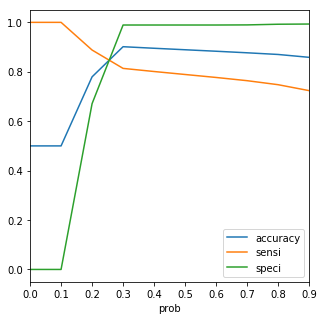

In [169]:
# Plotting Accuracy,Sensitivity and Specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [159]:
# Choosing optimal value as '0.25' from above graph
y_train_pred_final['m13_predicted'] = y_train_pred_final.m13_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [160]:
y_train_pred_final.head()

,m13,m13_Prob,m13_predicted
0,1,0.155105,0
1,1,0.223041,0
2,1,0.155105,0
3,1,1.000000,1
4,1,1.000000,1


In [161]:
#Accuracy score(For training data)
accuracy_score(y_train_pred_final.m13, y_train_pred_final.m13_predicted)

0.9053646618495608

In [162]:
#Confusion Matrix(For training data)
Conf_Matrix_LOR = confusion_matrix(y_train_pred_final.m13, y_train_pred_final.m13_predicted)
print(Conf_Matrix_LOR)

[[114179   1243]
 [ 20603  94819]]


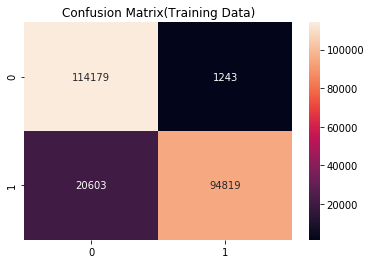

In [163]:
# Heatmap for Confusion matrix(Logistic Regression)
sb.heatmap(Conf_Matrix_LOR, annot=True,  fmt='');
title = 'Confusion Matrix(Training Data)'
plt.title(title);
rcParams['figure.figsize'] = 5,5

In [164]:
# Precision score
Conf_Matrix_LOR[1,1]/(Conf_Matrix_LOR[0,1]+Conf_Matrix_LOR[1,1])

0.9870604401324145

In [165]:
# Recall score
Conf_Matrix_LOR[1,1]/(Conf_Matrix_LOR[1,0]+Conf_Matrix_LOR[1,1])

0.8214985011522933

In [192]:
#Classification report(For training data)
print(classification_report(y_train_pred_final.m13, y_train_pred_final.m13_predicted))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91    115422
           1       0.99      0.82      0.90    115422

   micro avg       0.91      0.91      0.91    230844
   macro avg       0.92      0.91      0.90    230844
weighted avg       0.92      0.91      0.90    230844



## Predictions on Test data

In [171]:
data_test.shape

(35866, 28)

In [172]:
# Choosing only relevant features

data_test = data_test[['source','m1','m2','m4','m5','m6','m8','m10','m12']]

In [174]:
# Feature extraction
src = pd.get_dummies(data_test['source'],drop_first = False)

In [175]:
# Concatenating with original dataframe
data_test = pd.concat([data_test, src], axis = 1)

In [176]:
data_test.head()

,source,m1,m2,m4,m5,m6,m8,m10,m12,X,Y,Z
0,Y,0,0,0,0,0,0,0,0,0,1,0
1,X,0,0,0,0,0,0,0,0,1,0,0
2,Y,0,0,0,0,0,0,0,0,0,1,0
3,X,0,0,0,0,0,0,0,0,1,0,0
4,X,0,0,0,0,0,0,0,0,1,0,0


In [177]:
# Dropping features 'Y' and 'source'

data_test.drop(['source','Y'], axis = 1, inplace= True)

In [178]:
data_test.head()

,m1,m2,m4,m5,m6,m8,m10,m12,X,Z
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [179]:
# Adding a constant
X_test_sm = sm.add_constant(data_test)

In [180]:
# Predictions
y_test_pred = res.predict(X_test_sm)

In [181]:
y_test_pred[:10]

0    0.223041
1    0.157447
2    0.223041
3    0.157447
4    0.157447
5    0.223041
6    0.157447
7    0.157447
8    0.157447
9    0.155105
dtype: float64

In [182]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Let's see the head
y_pred_1.head()

,0
0,0.223041
1,0.157447
2,0.223041
3,0.157447
4,0.157447


In [184]:
# Renaming the column 
y_pred_1 = y_pred_1.rename(columns={ 0 : 'm13_Prob'})

In [185]:
y_pred_1.head()

,m13_Prob
0,0.223041
1,0.157447
2,0.223041
3,0.157447
4,0.157447


In [188]:
# Considering 0.25 as optimum cut off point
y_pred_1['m13'] = y_pred_1.m13_Prob.map(lambda x: 1 if x > 0.25 else 0)

In [191]:
y_pred_1.head()

,m13_Prob,m13
0,0.223041,0
1,0.157447,0
2,0.223041,0
3,0.157447,0
4,0.157447,0


In [196]:
# Creating a new dataframe for Sample submission
submissions = pd.DataFrame()

In [197]:
submissions['loan_id'] = [i for i in range(1,35867)]

In [199]:
# Appending from 'y_pred_1' dataframe
submissions['m13'] = y_pred_1[['m13']]

In [202]:
submissions.head()

,loan_id,m13
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [203]:
submissions.shape

(35866, 2)

In [204]:
# Creating sample submission file

filename = 'sample_submission.csv'

submissions.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: sample_submission.csv


## Remarks

-  As data was highly imbalanced, SMOTE oversampling technique was used.
-  Logistic Regression ML algorithm was used here as the use case was having only two classes.
-  Recursive feature elimination process is used here to cut down unnecessary/redundant features in the dataset.
-  Cutoff value of Variation Inflation factor(VIF) was chosen as 9 as per industry standards.